In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

Text(0.5, 1.0, 'gs[-1, -2]')

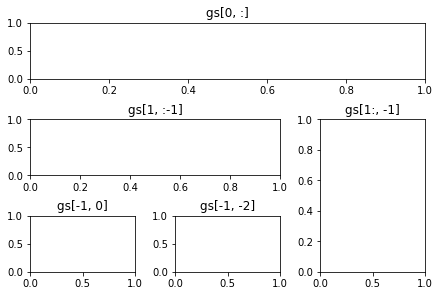

In [2]:
fig3 = plt.figure(constrained_layout=True)
gs = fig3.add_gridspec(3, 3)
f3_ax1 = fig3.add_subplot(gs[0, :])
f3_ax1.set_title('gs[0, :]')
f3_ax2 = fig3.add_subplot(gs[1, :-1])
f3_ax2.set_title('gs[1, :-1]')
f3_ax3 = fig3.add_subplot(gs[1:, -1])
f3_ax3.set_title('gs[1:, -1]')
f3_ax4 = fig3.add_subplot(gs[-1, 0])
f3_ax4.set_title('gs[-1, 0]')
f3_ax5 = fig3.add_subplot(gs[-1, -2])
f3_ax5.set_title('gs[-1, -2]')

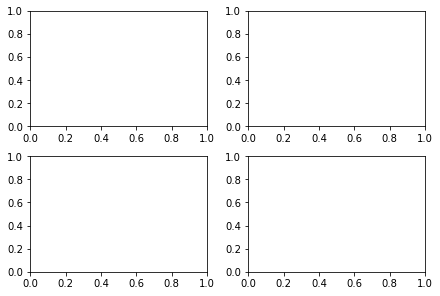

In [3]:
fig1, f1_axes = plt.subplots(ncols=2, nrows=2, constrained_layout=True)

In [4]:
df= pd.read_csv('movies_ratings.csv')

In [5]:
df.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [6]:
df.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [7]:
df.columns= map(str.lower,df.columns)

In [8]:
df= df.rename(columns= {'budget (million $)':'bugget', 'audience ratings %':'audience_rating','rotten tomatoes ratings %':'rt_rating',
                       'year of release':'year'})

In [9]:
df.film=df.film.astype('category')
#df.genre=df.genre.astype('category')
df.year=df.year.astype('category')

In [10]:
#df.info()

In [11]:
import numpy as np
from numpy.random import randn 
n=100
counter=0
for i in randn(n):
    if i>=-1 and i<1:
        counter=counter+1
counter/n

0.69

In [12]:
df.genre.unique()

array(['Comedy', 'Adventure', 'Action', 'Horror', 'Drama', 'Romance',
       'Thriller'], dtype=object)

In [13]:
df.year.unique()

[2009, 2008, 2010, 2007, 2011]
Categories (5, int64): [2009, 2008, 2010, 2007, 2011]

In [14]:
df.year.cat.categories

Int64Index([2007, 2008, 2009, 2010, 2011], dtype='int64')

In [15]:
import warnings

In [16]:
warnings.filterwarnings('ignore')

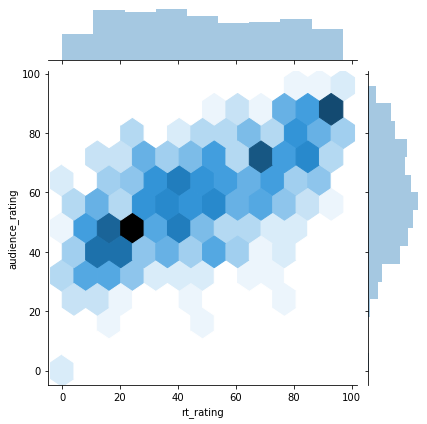

In [17]:
sns.jointplot(data=df,x='rt_rating',y='audience_rating',kind='hex' )

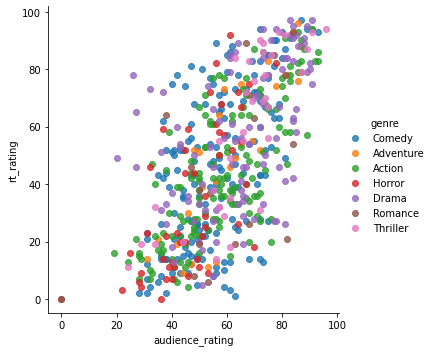

In [18]:
sns.lmplot(data=df,x='audience_rating',y='rt_rating',fit_reg=False, hue= 'genre')

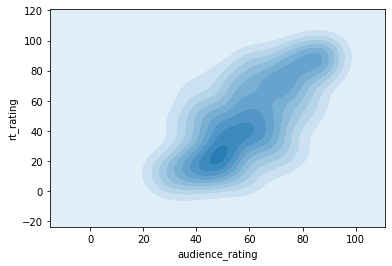

In [19]:
sns.kdeplot(df.audience_rating,df.rt_rating,shade=True)

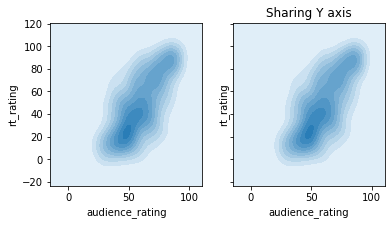

In [21]:
f, axes = plt.subplots(1,2, sharey=True, figsize=(6,3))
sns.kdeplot(df.audience_rating,df.rt_rating,shade=True,ax=axes[0]) 

axes[1].set_title('Sharing Y axis')
sns.kdeplot(df.audience_rating,df.rt_rating,shade=True,ax=axes[1])




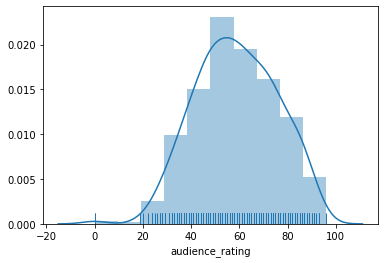

In [22]:
sns.distplot(df.audience_rating,rug=True,bins=10)

In [ ]:
df.groupby('audience_rating').audience_rating.count().plot(kind="line")


In [ ]:
plt.hist(df2.bugget)
plt.hist(df[df.genre=='Action'].bugget)
plt.legend(['this is x','this is action'])

In [ ]:
df2= df[df.audience_rating>=40]

In [ ]:
listhist=[df2.bugget,df[df.genre=='Action'].bugget]
plt.hist(listhist,bins=20,stacked=True)
#plt.grid()

In [ ]:
(df.groupby('genre')['bugget'].sum())

In [ ]:
list1=list()
mylabels=list()
for i in df.genre:
    list1.append(df[df.genre==i].bugget)
    mylabels.append(i)

In [ ]:
#plt.hist(list1,bin=30)
#g= sns.FacetGrid(df,row='genre',col='year',hue='genre')

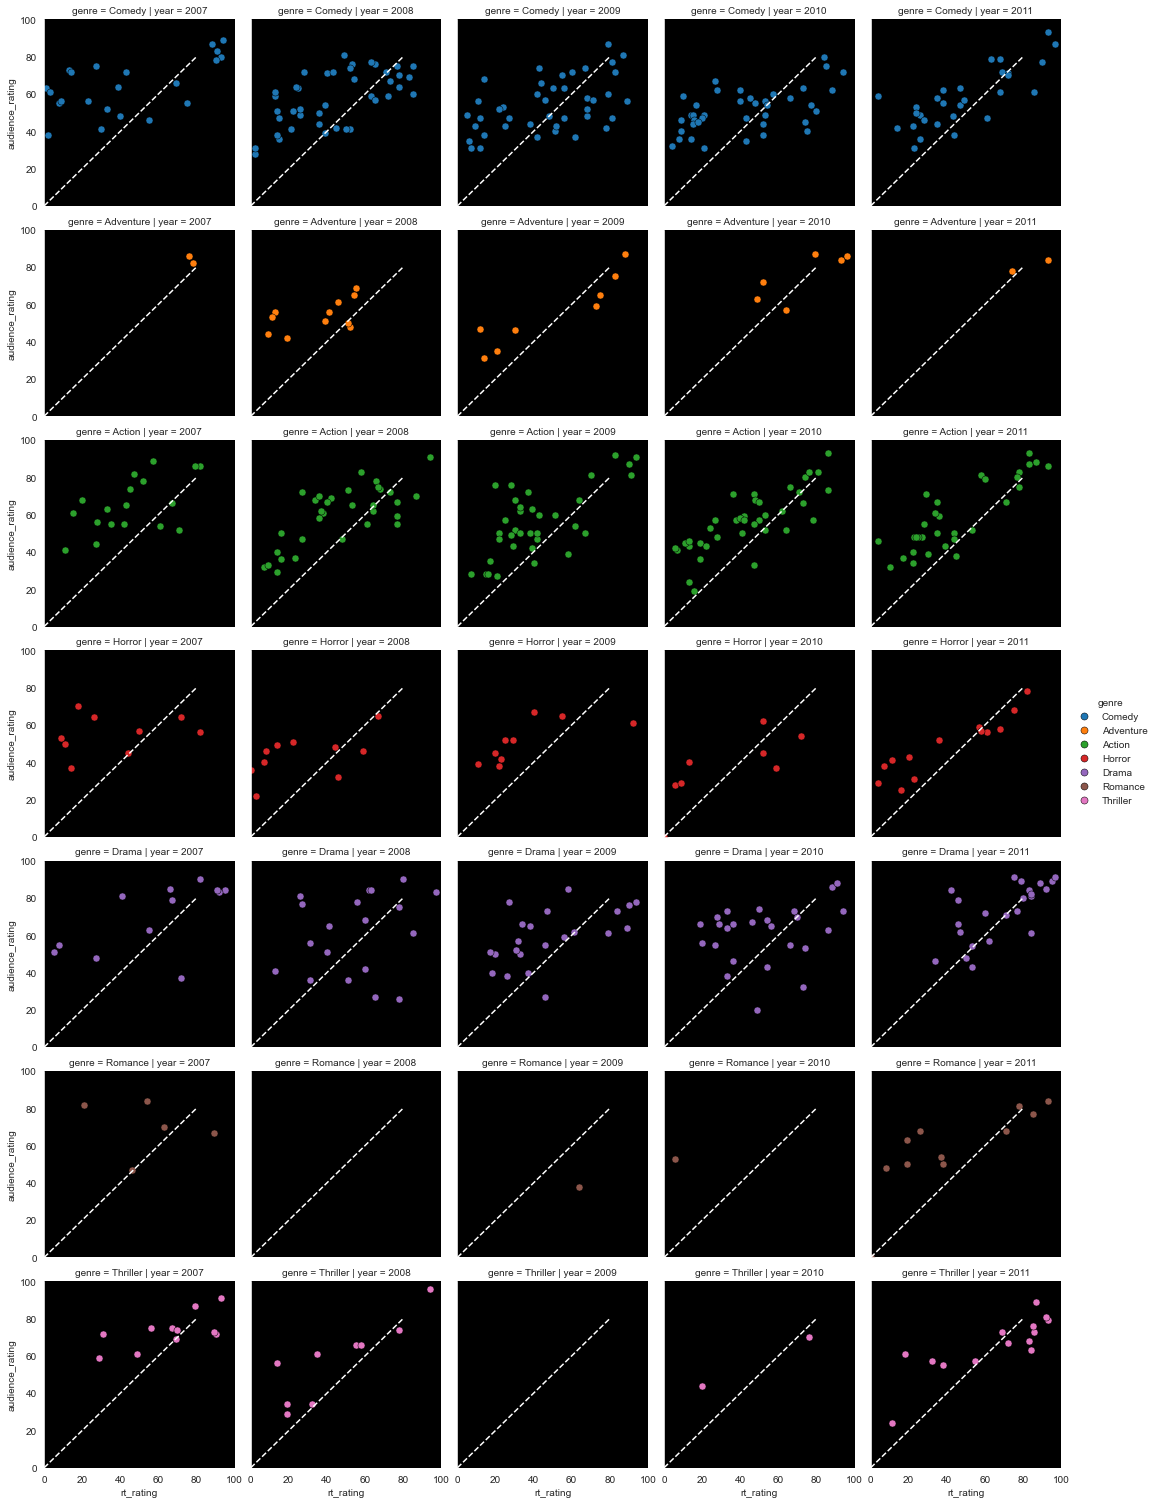

In [28]:
#plt.hist(list1,bin=30)

g= sns.FacetGrid(df,row='genre',col='year',hue='genre')
kws=dict(s=50,linewidth=0.5,edgecolor ='black')
g=g.map(plt.scatter, 'rt_rating', 'audience_rating',**kws)
g.set(xlim=(0,100),ylim=(0,100))
for ax in g.axes.flat:
    ax.plot((0,80),(0,80),c='white',ls='--')
g.add_legend()

In [ ]:
df.iat[0,4]

In [ ]:
df.head()

In [ ]:
df.at[1,'film']

In [ ]:
df.loc[1:2,['film']]

TypeError: lmplot() got an unexpected keyword argument 'ax'

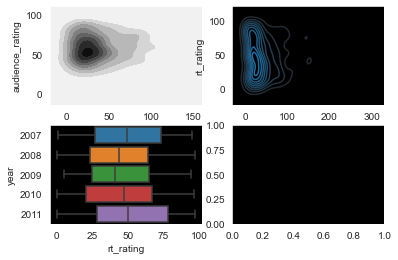

In [26]:
sns.set_style('dark',{'axes.facecolor':'black'})
f,axes=plt.subplots(2,2)
sns.kdeplot(df.bugget,df.audience_rating,shade=True,cmap='gist_gray_r',ax=axes[0,0]).set(xlim=(-20,160))
sns.kdeplot(df.bugget,df.rt_rating,ax=axes[0,1])
sns.boxplot(data=df,x='rt_rating',y='year',ax=axes[1,0])

In [ ]:
plt.figure(figsize=((6,6)))
plt.subplot(1,2,1)
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,marker='^')
plt.subplot(1,2,2)

plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,  color='blue',marker='^')
plt.plot(train.ENGINESIZE,regr.predict(train[['ENGINESIZE']]))
plt.xlabel("Engine size")
plt.ylabel("Emission")